In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the training and testing datasets
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv").values.ravel()
y_test = pd.read_csv("y_test.csv").values.ravel()

# Displaying the first few rows of the training dataset
print("Training Data Sample:")
print(X_train.info())

Training Data Sample:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 5634 non-null   int64  
 1   SeniorCitizen                          5634 non-null   int64  
 2   Partner                                5634 non-null   int64  
 3   Dependents                             5634 non-null   int64  
 4   tenure                                 5634 non-null   int64  
 5   PhoneService                           5634 non-null   int64  
 6   PaperlessBilling                       5634 non-null   int64  
 7   MonthlyCharges                         5634 non-null   float64
 8   TotalCharges                           5623 non-null   float64
 9   AutoPay Status                         5634 non-null   int64  
 10  First Month User                       5634 non-nu

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Initializing and training the logistic regression model
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Adjusting the threshold for positive predictions to improve recall
y_pred_adjusted = (y_pred_proba >= 0.4).astype(int)

# Evaluation of the model's performance
accuracy = accuracy_score(y_test, y_pred_adjusted)
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
class_report = classification_report(y_test, y_pred_adjusted)
roc_auc = roc_auc_score(y_test, y_pred_proba)

a = filter(lambda x: x==True, y_pred)
print(f"Number of positive predictions: {len(list(a))}")

# Displaying the evaluation results
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"ROC AUC Score: {roc_auc:.4f}")

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

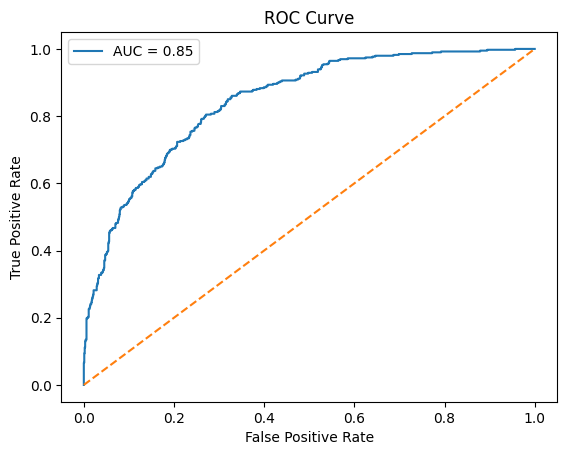

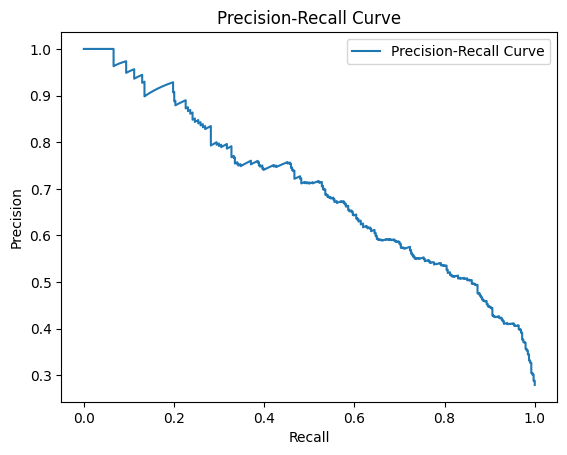

<Axes: >

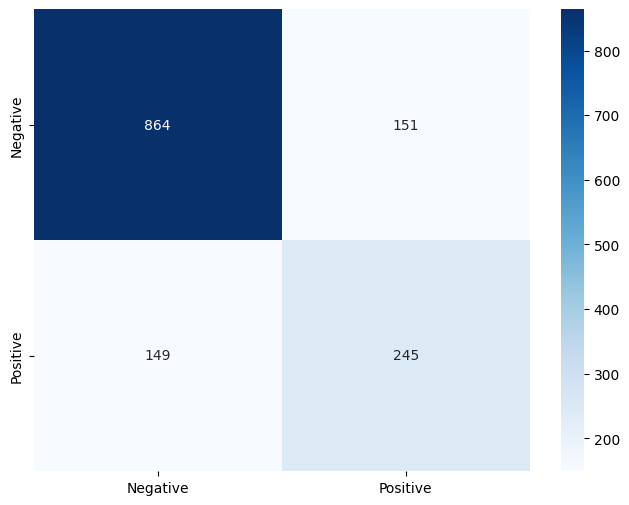

In [ ]:
# Plot the evaluation metrics
from sklearn.metrics import roc_curve, precision_recall_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plotting the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred_proba):.2f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plotting Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])

In [ ]:
import joblib

# Saving the trained model to a file
joblib.dump(model, 'churn_model.pkl')
joblib.dump(model, 'churn_model.joblib')

['churn_model.joblib']